# Funciones para Interacturar con el mercado, crear ordenes y obtener información de nuestra cuenta

In [4]:
import requests, json
API_KEY='PKSV7UHBVU01KTP5GPY4'
SECRET_KEY='D12wf12S8oYnsOaI03ynQ8lfODzeZ87Q7wV1gBZR'
BASE_URL = "https://paper-api.alpaca.markets"
ACCOUNT_URL = "{}/v2/account".format(BASE_URL)
OPEN_POSITION = "{}/v2/positions".format(BASE_URL)
ORDERS_URL = "{}/v2/orders".format(BASE_URL)
HEADERS = {'APCA-API-KEY-ID': API_KEY, 'APCA-API-SECRET-KEY': SECRET_KEY}

def get_account():
    r = requests.get(ACCOUNT_URL, headers=HEADERS)

    return json.loads(r.content)


def create_order(symbol, qty, side, type, time_in_force):
    data = {
        "symbol": symbol,
        "qty": qty,
        "side": side,
        "type": type,
        "time_in_force": time_in_force
    }

    r = requests.post(ORDERS_URL, json=data, headers=HEADERS)

    return json.loads(r.content)

def get_orders():
    r = requests.get(ORDERS_URL, headers=HEADERS)

    return json.loads(r.content)


In [24]:
def order_pendiente(STOCK):
  for element in get_orders():
    if element.get('symbol') == STOCK:
    #print( element.get('status'))
      if element.get('status') == 'filled':
        return False
      else:
        return True
    else:
      return False

    #return element.get('status')


In [27]:
order_pendiente('AMZN')

False

In [21]:
get_orders()

[{'asset_class': 'us_equity',
  'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
  'canceled_at': None,
  'client_order_id': '339a3671-2365-4b7d-8421-f2ff3167865b',
  'created_at': '2020-10-31T14:21:18.928234Z',
  'expired_at': None,
  'extended_hours': False,
  'failed_at': None,
  'filled_at': None,
  'filled_avg_price': None,
  'filled_qty': '0',
  'hwm': None,
  'id': '34de363c-31bd-4792-b9d7-d4971d95d001',
  'legs': None,
  'limit_price': None,
  'order_class': '',
  'order_type': 'market',
  'qty': '10',
  'replaced_at': None,
  'replaced_by': None,
  'replaces': None,
  'side': 'buy',
  'status': 'accepted',
  'stop_price': None,
  'submitted_at': '2020-10-31T14:21:18.912448Z',
  'symbol': 'AAPL',
  'time_in_force': 'gtc',
  'trail_percent': None,
  'trail_price': None,
  'type': 'market',
  'updated_at': '2020-10-31T14:21:18.928234Z'},
 {'asset_class': 'us_equity',
  'asset_id': 'b6d1aa75-5c9c-4353-a305-9e2caa1925ab',
  'canceled_at': None,
  'client_order_id': '8f9a9e63-be6

In [5]:
def get_open_positions():
  r = requests.get(OPEN_POSITION, headers=HEADERS)
  return json.loads(r.content)

In [8]:

qty=get_open_positions()[0].get('qty')
qty=int(qty)

'5'

In [13]:
lst_qy =[]
for element in  get_open_positions():
  if element.get('symbol') =='AAPL':
    #print(element.get('qty'))
    lst_qy.append(element.get('qty'))

In [14]:
lst_qy

['100']

In [ ]:
r = requests.get(BARS,headers=HEADERS)

In [ ]:
print(r.content)

b'Not Found'


In [ ]:
cuenta = get_account()
cuenta

{'account_blocked': False,
 'account_number': 'PA2JA8WEC5CM',
 'buying_power': '335191.172',
 'cash': '45856.27',
 'created_at': '2020-09-13T20:59:29.728912Z',
 'currency': 'USD',
 'daytrade_count': 1,
 'daytrading_buying_power': '335191.172',
 'equity': '98184.47',
 'id': '1c17756c-e976-460c-af8d-7fbf5edeccdd',
 'initial_margin': '27064.1',
 'last_equity': '100733.24',
 'last_maintenance_margin': '16485.447',
 'long_market_value': '52328.2',
 'maintenance_margin': '15720.15',
 'multiplier': '4',
 'pattern_day_trader': False,
 'portfolio_value': '98184.47',
 'regt_buying_power': '142240.74',
 'short_market_value': '0',
 'shorting_enabled': True,
 'sma': '0',
 'status': 'ACTIVE',
 'trade_suspended_by_user': False,
 'trading_blocked': False,
 'transfers_blocked': False}

In [ ]:
print(cuenta.get('portfolio_value'))

94764.59


In [ ]:
print(cuenta)

{'id': '1c17756c-e976-460c-af8d-7fbf5edeccdd', 'account_number': 'PA2JA8WEC5CM', 'status': 'ACTIVE', 'currency': 'USD', 'buying_power': '326491.184', 'regt_buying_power': '138238.95', 'daytrading_buying_power': '326491.184', 'cash': '84002.76', 'portfolio_value': '94764.59', 'pattern_day_trader': False, 'trading_blocked': False, 'transfers_blocked': False, 'account_blocked': False, 'created_at': '2020-09-13T20:59:29.728912Z', 'trade_suspended_by_user': False, 'multiplier': '4', 'shorting_enabled': True, 'equity': '94764.59', 'last_equity': '95107.6', 'long_market_value': '10761.83', 'short_market_value': '0', 'initial_margin': '25645.115', 'maintenance_margin': '3249.198', 'last_maintenance_margin': '3352.704', 'sma': '0', 'daytrade_count': 6}


In [ ]:
print((cuenta.get('cash')))

84002.76


In [ ]:
response1 = create_order("AAPL", 10, "buy", "market", "gtc")
#response2 = create_order("MSFT", 1000, "buy", "market", "gtc")

In [ ]:
response1

{'asset_class': 'us_equity',
 'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
 'canceled_at': None,
 'client_order_id': '339a3671-2365-4b7d-8421-f2ff3167865b',
 'created_at': '2020-10-31T14:21:18.928234Z',
 'expired_at': None,
 'extended_hours': False,
 'failed_at': None,
 'filled_at': None,
 'filled_avg_price': None,
 'filled_qty': '0',
 'hwm': None,
 'id': '34de363c-31bd-4792-b9d7-d4971d95d001',
 'legs': None,
 'limit_price': None,
 'order_class': '',
 'order_type': 'market',
 'qty': '10',
 'replaced_at': None,
 'replaced_by': None,
 'replaces': None,
 'side': 'buy',
 'status': 'accepted',
 'stop_price': None,
 'submitted_at': '2020-10-31T14:21:18.912448Z',
 'symbol': 'AAPL',
 'time_in_force': 'gtc',
 'trail_percent': None,
 'trail_price': None,
 'type': 'market',
 'updated_at': '2020-10-31T14:21:18.928234Z'}

In [ ]:
response2 = create_order("MSFT", 1000, "sell", "market", "gtc")

In [ ]:
print(response1)

In [ ]:
orders = get_orders()

print(orders[0])

{'id': '6a570960-4ffe-40a5-8775-7525d264570a', 'client_order_id': 'ccb3197a-0c9a-40d1-80d5-5b9011bdfe0b', 'created_at': '2020-09-19T11:19:46.796066Z', 'updated_at': '2020-09-19T11:19:46.796066Z', 'submitted_at': '2020-09-19T11:19:46.793169Z', 'filled_at': None, 'expired_at': None, 'canceled_at': None, 'failed_at': None, 'replaced_at': None, 'replaced_by': None, 'replaces': None, 'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415', 'symbol': 'AAPL', 'asset_class': 'us_equity', 'qty': '10', 'filled_qty': '0', 'filled_avg_price': None, 'order_class': '', 'order_type': 'market', 'type': 'market', 'side': 'sell', 'time_in_force': 'gtc', 'limit_price': None, 'stop_price': None, 'status': 'accepted', 'extended_hours': False, 'legs': None, 'trail_percent': None, 'trail_price': None, 'hwm': None}


In [ ]:
def create_order_limit(symbol, qty, side, type, time_in_force,limit_price):
    data = {
        "symbol": symbol,
        "qty": qty,
        "side": side,
        "type": type,
        "time_in_force": time_in_force,
        "limit_price": limit_price

    }
    r = requests.post(ORDERS_URL, json=data, headers=HEADERS)

    return json.loads(r.content)

In [ ]:
response3 =create_order_limit("V", 10, "buy", "limit", "gtc",180)

In [ ]:
print(response3)

{'id': '88446c18-eb25-49b6-a865-317926db62e4', 'client_order_id': '93b851de-0fb8-46f9-8e80-988c35461dd1', 'created_at': '2020-09-20T17:09:03.636488Z', 'updated_at': '2020-09-20T17:09:03.636488Z', 'submitted_at': '2020-09-20T17:09:03.623452Z', 'filled_at': None, 'expired_at': None, 'canceled_at': None, 'failed_at': None, 'replaced_at': None, 'replaced_by': None, 'replaces': None, 'asset_id': '4f5baf1e-0e9b-4d85-b88a-d874dc4a3c42', 'symbol': 'V', 'asset_class': 'us_equity', 'qty': '10', 'filled_qty': '0', 'filled_avg_price': None, 'order_class': '', 'order_type': 'limit', 'type': 'limit', 'side': 'buy', 'time_in_force': 'gtc', 'limit_price': '180', 'stop_price': None, 'status': 'accepted', 'extended_hours': False, 'legs': None, 'trail_percent': None, 'trail_price': None, 'hwm': None}


In [ ]:
def create_order_complete(symbol, qty, side, type, time_in_force,limit_price,stop_loss):
    data = {
        "symbol": symbol,
        "qty": qty,
        "side": side,
        "type": type,
        "time_in_force": time_in_force,
        "order_class": 'bracket',
        "take_profit":{"limit_price":limit_price},
        "stop_loss":{'stop_price':stop_loss},     
    }
    r = requests.post(ORDERS_URL, json=data, headers=HEADERS)

    return json.loads(r.content)

In [ ]:
response4 =create_order_complete("V", 5, "buy", "market", "gtc",220,160)

In [ ]:
print(response4)

{'id': 'e3ec09dd-506d-4861-8fc8-fd76c6266956', 'client_order_id': '1d876bec-1715-490e-8e1a-0c319b53241c', 'created_at': '2020-09-20T17:11:13.907273Z', 'updated_at': '2020-09-20T17:11:13.919631Z', 'submitted_at': '2020-09-20T17:11:13.892872Z', 'filled_at': None, 'expired_at': None, 'canceled_at': None, 'failed_at': None, 'replaced_at': None, 'replaced_by': None, 'replaces': None, 'asset_id': '4f5baf1e-0e9b-4d85-b88a-d874dc4a3c42', 'symbol': 'V', 'asset_class': 'us_equity', 'qty': '5', 'filled_qty': '0', 'filled_avg_price': None, 'order_class': 'bracket', 'order_type': 'market', 'type': 'market', 'side': 'buy', 'time_in_force': 'gtc', 'limit_price': None, 'stop_price': None, 'status': 'accepted', 'extended_hours': False, 'legs': [{'id': 'ce64a4ac-b4b0-4184-bc0b-d83216e513e4', 'client_order_id': '0f58579d-3e56-4097-9837-300793f1dd8e', 'created_at': '2020-09-20T17:11:13.907273Z', 'updated_at': '2020-09-20T17:11:13.907273Z', 'submitted_at': '2020-09-20T17:11:13.892872Z', 'filled_at': None, 

In [ ]:
orders = get_orders()

print(orders)

[{'id': '34de363c-31bd-4792-b9d7-d4971d95d001', 'client_order_id': '339a3671-2365-4b7d-8421-f2ff3167865b', 'created_at': '2020-10-31T14:21:18.928234Z', 'updated_at': '2020-10-31T14:21:18.928234Z', 'submitted_at': '2020-10-31T14:21:18.912448Z', 'filled_at': None, 'expired_at': None, 'canceled_at': None, 'failed_at': None, 'replaced_at': None, 'replaced_by': None, 'replaces': None, 'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415', 'symbol': 'AAPL', 'asset_class': 'us_equity', 'qty': '10', 'filled_qty': '0', 'filled_avg_price': None, 'order_class': '', 'order_type': 'market', 'type': 'market', 'side': 'buy', 'time_in_force': 'gtc', 'limit_price': None, 'stop_price': None, 'status': 'accepted', 'extended_hours': False, 'legs': None, 'trail_percent': None, 'trail_price': None, 'hwm': None}, {'id': '18dbba52-b634-488a-8a60-088cedcf7057', 'client_order_id': '8f9a9e63-be63-4fa2-b3f8-a6330dea2009', 'created_at': '2020-09-19T11:06:30.145013Z', 'updated_at': '2020-09-21T13:30:26.852448Z', 'subm

In [ ]:
print(response4)

{'id': 'e5339170-50d6-4f7b-b4ec-aaceab29c3e5', 'client_order_id': 'd11bd5c0-184c-4168-baed-159eae2455ae', 'created_at': '2020-09-19T11:07:58.786238Z', 'updated_at': '2020-09-19T11:07:58.795919Z', 'submitted_at': '2020-09-19T11:07:58.774228Z', 'filled_at': None, 'expired_at': None, 'canceled_at': None, 'failed_at': None, 'replaced_at': None, 'replaced_by': None, 'replaces': None, 'asset_id': 'b6d1aa75-5c9c-4353-a305-9e2caa1925ab', 'symbol': 'MSFT', 'asset_class': 'us_equity', 'qty': '10', 'filled_qty': '0', 'filled_avg_price': None, 'order_class': 'oto', 'order_type': 'market', 'type': 'market', 'side': 'buy', 'time_in_force': 'gtc', 'limit_price': None, 'stop_price': None, 'status': 'accepted', 'extended_hours': False, 'legs': [{'id': '25497166-db4c-49ae-a415-f45cf5e37891', 'client_order_id': '903afb66-26d1-474c-a6b5-21024fd2f0ce', 'created_at': '2020-09-19T11:07:58.786238Z', 'updated_at': '2020-09-19T11:07:58.786238Z', 'submitted_at': '2020-09-19T11:07:58.774228Z', 'filled_at': None, 

In [ ]:
print(response3)

{'code': 40010001, 'message': 'stop limit orders require both stop and limit price'}


# Extracción de datos

In [ ]:
BASE_URL_data = "https://data.alpaca.markets/v1"

In [ ]:
data_15min = "{}/bars/15Min?symbols=MSFT,V".format(BASE_URL_data)

In [ ]:
data_15min = "{}/bars/15Min?symbols={}&limit=100".format(BASE_URL_data,'MSFT,AAPL')

In [ ]:
valores = ['V','TSLA']

In [ ]:
r = requests.get(data_15min,headers=HEADERS)

In [ ]:
print(r.content)

b'{"AAPL":[{"t":1600886700,"o":108.065,"h":108.07,"l":107.45,"c":107.7,"v":182705},{"t":1600887600,"o":107.689,"h":107.89,"l":106.81,"c":107.78,"v":140718},{"t":1600888500,"o":107.79,"h":107.921,"l":107.15,"c":107.675,"v":152073},{"t":1600889400,"o":107.69,"h":108.03,"l":107.52,"c":107.865,"v":200697},{"t":1600890300,"o":107.82,"h":107.985,"l":106.79,"c":107.21,"v":398889},{"t":1600891200,"o":107.07,"h":107.07,"l":107.07,"c":107.07,"v":100},{"t":1600892100,"o":106.851,"h":106.959,"l":106.851,"c":106.941,"v":340},{"t":1600893000,"o":107.021,"h":107.021,"l":106.941,"c":106.999,"v":530},{"t":1600893900,"o":106.871,"h":106.871,"l":106.871,"c":106.871,"v":100},{"t":1600894800,"o":106.811,"h":106.811,"l":106.699,"c":106.699,"v":300},{"t":1600895700,"o":106.311,"h":106.311,"l":106.311,"c":106.311,"v":100},{"t":1600897500,"o":106.049,"h":106.049,"l":106.049,"c":106.049,"v":151},{"t":1600898400,"o":106.741,"h":106.746,"l":106.526,"c":106.526,"v":600},{"t":1600899300,"o":106.52,"h":106.749,"l":1

## Manipulación de datos

In [ ]:
import pandas as pd
import json

In [ ]:
print(r.content)

b'{"AAPL":[{"t":1600886700,"o":108.065,"h":108.07,"l":107.45,"c":107.7,"v":182705},{"t":1600887600,"o":107.689,"h":107.89,"l":106.81,"c":107.78,"v":140718},{"t":1600888500,"o":107.79,"h":107.921,"l":107.15,"c":107.675,"v":152073},{"t":1600889400,"o":107.69,"h":108.03,"l":107.52,"c":107.865,"v":200697},{"t":1600890300,"o":107.82,"h":107.985,"l":106.79,"c":107.21,"v":398889},{"t":1600891200,"o":107.07,"h":107.07,"l":107.07,"c":107.07,"v":100},{"t":1600892100,"o":106.851,"h":106.959,"l":106.851,"c":106.941,"v":340},{"t":1600893000,"o":107.021,"h":107.021,"l":106.941,"c":106.999,"v":530},{"t":1600893900,"o":106.871,"h":106.871,"l":106.871,"c":106.871,"v":100},{"t":1600894800,"o":106.811,"h":106.811,"l":106.699,"c":106.699,"v":300},{"t":1600895700,"o":106.311,"h":106.311,"l":106.311,"c":106.311,"v":100},{"t":1600897500,"o":106.049,"h":106.049,"l":106.049,"c":106.049,"v":151},{"t":1600898400,"o":106.741,"h":106.746,"l":106.526,"c":106.526,"v":600},{"t":1600899300,"o":106.52,"h":106.749,"l":1

In [ ]:
json_data = json.dumps(r.json(),indent=4)


In [ ]:
print(json_data)

In [ ]:
 pd = pd.read_json(json_data)

In [ ]:
pd.head(10)

,AAPL,MSFT
0,"{'t': 1600886700, 'o': 108.065, 'h': 108.07, '...","{'t': 1600799400, 'o': 206.575, 'h': 206.66, '..."
1,"{'t': 1600887600, 'o': 107.689, 'h': 107.89, '...","{'t': 1600800300, 'o': 205.775, 'h': 206.02, '..."
2,"{'t': 1600888500, 'o': 107.79, 'h': 107.921, '...","{'t': 1600801200, 'o': 205.7, 'h': 206.785, 'l..."
3,"{'t': 1600889400, 'o': 107.69, 'h': 108.03, 'l...","{'t': 1600802100, 'o': 206.2, 'h': 207.21, 'l'..."
4,"{'t': 1600890300, 'o': 107.82, 'h': 107.985, '...","{'t': 1600803000, 'o': 207.07, 'h': 207.495, '..."
5,"{'t': 1600891200, 'o': 107.07, 'h': 107.07, 'l...","{'t': 1600803900, 'o': 207.37, 'h': 208.09, 'l..."
6,"{'t': 1600892100, 'o': 106.851, 'h': 106.959, ...","{'t': 1600806600, 'o': 207.34, 'h': 207.34, 'l..."
7,"{'t': 1600893000, 'o': 107.021, 'h': 107.021, ...","{'t': 1600807500, 'o': 207.246, 'h': 207.246, ..."
8,"{'t': 1600893900, 'o': 106.871, 'h': 106.871, ...","{'t': 1600808400, 'o': 207.2, 'h': 207.2, 'l':..."
9,"{'t': 1600894800, 'o': 106.811, 'h': 106.811, ...","{'t': 1600858800, 'o': 208.57, 'h': 208.57, 'l..."


In [ ]:
from datetime import datetime 
timestamp = 1600886700
dt_object = datetime.fromtimestamp(timestamp)

In [ ]:
print("dt_object =", dt_object)

dt_object = 2020-09-23 18:45:00


In [ ]:
close_values = []
data_time3 = []


In [ ]:
data_time.append(dt_object)
print(data_time[0])

2020-09-23 18:45:00


In [ ]:
for i in range(100):
   close_values.append(pd['AAPL'][i].get('c'))

In [ ]:
print(close_values)

[107.7, 107.78, 107.675, 107.865, 107.21, 107.07, 106.941, 106.999, 106.871, 106.699, 106.311, 106.049, 106.526, 106.749, 106.356, 106.35, 106.4, 106.37, 106.309, 106.549, 105.851, 105.761, 105.739, 105.08, 105.204, 105.224, 105.3, 107.215, 108.7, 108.865, 108.211, 107.81, 109.171, 109.2, 109.36, 109.75, 109.575, 109.47, 109.55, 109.129, 109.565, 109.675, 109.77, 110.105, 109.44, 109.53, 108.99, 109.2, 108.09, 108.775, 107.93, 108.55, 108.26, 108.284, 108.304, 108.71, 108.599, 108.736, 108.951, 109.186, 108.849, 108.904, 108.986, 107.51, 108.844, 108.67, 108.666, 109.03, 109.051, 108.59, 108.53, 109.15, 108.91, 109.89, 110.29, 110.06, 110.66, 110.46, 110.07, 109.85, 110.615, 110.275, 110.47, 110.71, 110.905, 110.745, 110.86, 111.25, 111.28, 111.5, 111.48, 111.74, 112.005, 112.005, 112.215, 112.22, 112.471, 112.471, 112.461, 112.151]


In [ ]:
pd['AAPL'][0].get('c')

In [ ]:
for i in range(100):
  t = pd['AAPL'][i].get('t')
  b = datetime.fromtimestamp(t)
  b=str(data_time[i].month) + "-" + str( data_time[i].day) + "-" +str( data_time[i].hour) + ":" +str(data_time[i].minute) +":" + str(data_time[i].second)
  print(b)
  data_time3.append(b)
  


In [ ]:
print(data_time3[2:])

['9-23-18:45:0', '9-23-19:0:0', '9-23-19:15:0', '9-23-19:30:0', '9-23-19:45:0', '9-23-20:0:0', '9-23-20:15:0', '9-23-20:30:0', '9-23-20:45:0', '9-23-21:0:0', '9-23-21:15:0', '9-23-21:45:0', '9-23-22:0:0', '9-23-22:15:0', '9-23-22:30:0', '9-23-22:45:0', '9-23-23:0:0', '9-24-11:0:0', '9-24-11:15:0', '9-24-11:30:0', '9-24-11:45:0', '9-24-12:0:0', '9-24-12:15:0', '9-24-12:30:0', '9-24-12:45:0', '9-24-13:0:0', '9-24-13:15:0', '9-24-13:30:0', '9-24-13:45:0', '9-24-14:0:0', '9-24-14:15:0', '9-24-14:30:0', '9-24-14:45:0', '9-24-15:0:0', '9-24-15:15:0', '9-24-15:30:0', '9-24-15:45:0', '9-24-16:0:0', '9-24-16:15:0', '9-24-16:30:0', '9-24-16:45:0', '9-24-17:0:0', '9-24-17:15:0', '9-24-17:30:0', '9-24-17:45:0', '9-24-18:0:0', '9-24-18:15:0', '9-24-18:30:0', '9-24-18:45:0', '9-24-19:0:0', '9-24-19:15:0', '9-24-19:30:0', '9-24-19:45:0', '9-24-20:0:0', '9-24-20:15:0', '9-24-20:45:0', '9-24-21:0:0', '9-24-21:15:0', '9-24-21:45:0', '9-24-22:0:0', '9-24-22:15:0', '9-24-22:30:0', '9-24-22:45:0', '9-25-11

In [ ]:
str(data_time[0].month) + "-" + str( data_time[0].day) + "-" +str( data_time[0].hour)

'9-23-18'

In [ ]:
pd['AAPL'][0].get('c')

107.7

# 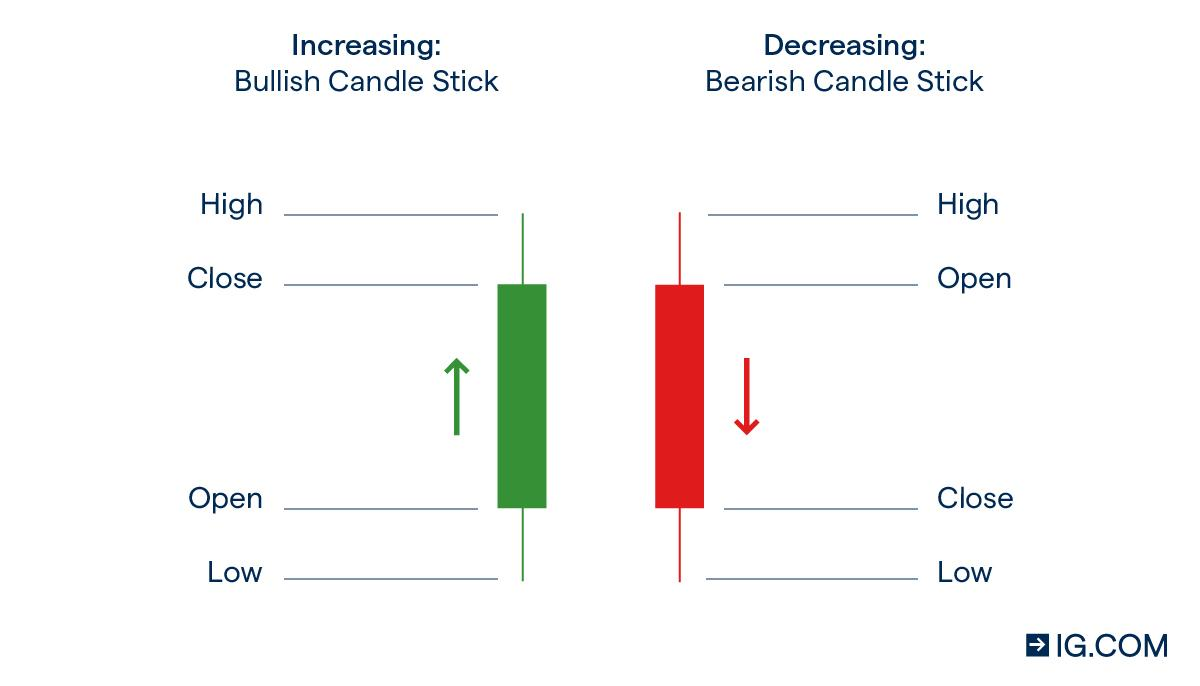
